In [190]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [191]:
def normalizar(media, std):

    total = np.sum(media)
    media_norm = media / total * 100
    std_norm = std / total * 100

    return media_norm, std_norm

In [192]:
R1_0_10_Pt = np.array([28.51, 2050.90, 628.40, 1958.85, 3427.94 , 911.33])
R1_10_20_Pt = np.array([45.83, 2554.00, 661.17, 1420.65, 3216.18, 1339.62])

R2_0_10_Pt = np.array([44.75, 2198.62, 608.01, 1522.66,  3573.53 , 1264.57 ])
R2_10_20_Pt = np.array([49.56, 2235.01, 676.46, 1486.42, 2693.38, 1247.47])

labels_amostras = ["R1 0–10", "R2 0–10", "R1 10–20", "R2 10–20"]

R1_0_10_Pi = np.array([0, 0, 84.30, 53.52, 0, 0])
R1_10_20_Pi = np.array([0, 0, 152.77, 93.00, 0, 0])

R2_0_10_Pi = np.array([0, 0, 162.95, 115.59, 0, 0 ])
R2_10_20_Pi = np.array([0, 0, 142.59, 68.51, 0, 0])

R1_0_10_Po = np.array([R1_0_10_Pt[0], R1_0_10_Pt[1], R1_0_10_Pt[2] - 101.16, R1_0_10_Pt[3] - 64.22, R1_0_10_Pt[4], R1_0_10_Pt[5]])
R2_0_10_Po = np.array([R2_0_10_Pt[0], R2_0_10_Pt[1], R2_0_10_Pt[2] - 195.33, R2_0_10_Pt[3] - 138.71, R2_0_10_Pt[4], R2_0_10_Pt[5]])

R1_10_20_Po = np.array([R1_10_20_Pt[0], R1_10_20_Pt[1], R1_10_20_Pt[2] - 183.32, R1_10_20_Pt[3] - 111.60, R1_10_20_Pt[4], R1_10_20_Pt[5]])
R2_10_20_Po = np.array([R2_10_20_Pt[0], R2_10_20_Pt[1], R2_10_20_Pt[2] - 171.11, R2_10_20_Pt[3] - 82.21, R2_10_20_Pt[4], R2_10_20_Pt[5]])

dados_0_20 = np.vstack([R1_0_10_Pt,R2_0_10_Pt, R1_10_20_Pt,R2_10_20_Pt])
dados_0_10 = np.vstack([R1_0_10_Pt,R2_0_10_Pt])
dados_10_20 = np.vstack([R1_10_20_Pt,R2_10_20_Pt])

Po = np.vstack([R1_0_10_Po, R2_0_10_Po, R1_10_20_Po, R2_10_20_Po])
Pi = np.vstack([R1_0_10_Pi, R2_0_10_Pi, R1_10_20_Pi, R2_10_20_Pi])

In [193]:
# tyudo junto
media_0_20 = np.mean(dados_0_20, axis=0)
std_0_20 = np.std(dados_0_20, axis=0, ddof=1)

media_0_20_norm, std_0_20_norm= normalizar(media_0_20, std_0_20)

#0-10
media_0_10 = np.mean(dados_0_10, axis = 0)
std_0_10 = np.std(dados_0_10, axis=0, ddof =1)

#10-20
media_10_20 = np.mean(dados_10_20, axis = 0)
std_10_20 = np.std(dados_10_20, axis = 0, ddof = 1)

#Po ou Pi
media_Po = np.mean(Po, axis = 0)
std_Po = np.std(Po, axis = 0, ddof=1)
media_Pi = np.mean(Pi, axis = 0)
std_Pi = np.std(Pi, axis = 0, ddof = 1)

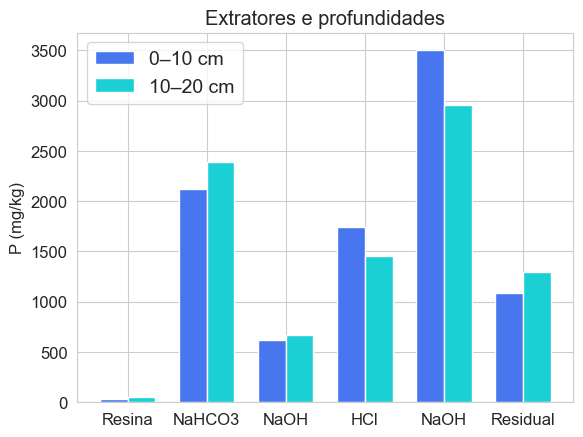

In [194]:
labels = ['Resina', 'NaHCO3', 'NaOH', 'HCl', 'NaOH', 'Residual']

means_0_10 = (R1_0_10_Pt + R2_0_10_Pt) / 2
means_10_20 = (R1_10_20_Pt + R2_10_20_Pt) / 2

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, means_0_10, width, label='0–10 cm')
ax.bar(x + width/2, means_10_20, width, label='10–20 cm')

ax.set_ylabel('P (mg/kg)')
ax.set_title('Extratores e profundidades')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [195]:
media_0_20_norm

array([ 0.47051347, 25.21642504,  7.18126584, 17.82337932, 36.02024003,
       13.28817632])

In [180]:
nomes_termos = [
    "Resina",
    "NaHCO₃",
    "NaOH 0,1 M",
    "HCl 1 M",
    "NaOH 0,5 M",
    "Residual"
]

cores = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725', '#ffa600']

fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("Normalizado (%)", "Absoluto"),
    shared_yaxes=False
)

def add_stacked_bars_with_errors(fig, medias, stds, col, cores, nomes):
    # Base acumulada para empilhamento manual
    bases = np.cumsum(np.insert(medias, 0, 0))[:-1]

    for i in range(len(medias)):
        # Barra empilhada
        fig.add_trace(go.Bar(
            x=["0–20 cm"],
            y=[medias[i]],
            base=[bases[i]],
            name=nomes[i],
            marker_color=cores[i],
            offsetgroup=str(i),
            showlegend=(col == 1)  # legenda apenas no primeiro gráfico
        ), row=1, col=col)

        # Linha do erro no topo de cada segmento
        fig.add_trace(go.Scatter(
            x=["0–20 cm"],
            y=[bases[i] + medias[i]],
            mode='lines',
            line=dict(color='black', width=1.5),
            error_y=dict(
                type='data',
                array=[stds[i]],
                visible=True,
                thickness=1.5,
                width=4,
                color='black'
            ),
            showlegend=False,
            hoverinfo='skip'
        ), row=1, col=col)


# --- Gráficos ---
add_stacked_bars_with_errors(fig, media_0_20_norm, std_0_20_norm, 1, cores, nomes_termos)
add_stacked_bars_with_errors(fig, media_0_20, std_0_20, 2, cores, nomes_termos)

# --- Layout ---
fig.update_layout(
    barmode='stack',
    title_text="Distribuição dos termos de P (0–20 cm)",
    yaxis_title="Percentual (%)",
    yaxis2_title="Concentração (mg/kg)",
    legend_title="Termos de P",
    legend=dict(x=1.05, y=1),
    bargap=0.25,
    width=1000,
    height=600,
    template="plotly_white"
)

fig.show()


In [181]:
dados = np.column_stack([R1_0_10_Pt, R2_0_10_Pt, R1_10_20_Pt, R2_10_20_Pt])

nomes_termos = ["Resina", "NaHCO3", "NaOH 0,1 M", "HCl 1 M", "NaOH 0,5 M", "Residual"]
cores = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725', '#ffa600']

fig = go.Figure()

for i, termo in enumerate(nomes_termos):
    fig.add_trace(go.Bar(
        x=labels_amostras,
        y=dados[i],
        name=termo,
        marker_color=cores[i],
        hovertemplate=(
            f"{termo}<br>"
            "Amostra: %{x}<br>"
            "Valor: %{y:.2f}<extra></extra>"
        )
    ))

fig.update_layout(
    barmode='stack',
    title="Distribuição dos termos de P por amostra",
    yaxis_title="Concentração em mg/kg",
    legend_title="Termos",
    width=900,
    height=600,
    template="plotly_white"
)

fig.show()


In [196]:
# --- Nomes e cores ---
nomes_termos = ["Resina", "NaHCO3", "NaOH 0,1 M", "HCl 1 M", "NaOH 0,5 M", "Residual"]
cores = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725', '#ffa600']

# --- Subplots ---
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Normalizado (%)", "Absoluto"),
                    shared_yaxes=False)

# ==========================
# FUNÇÃO AUXILIAR
# ==========================
def add_stacked_bars_with_errors(fig, profundidades, medias, stds, col, cores, nomes):
    """
    profundidades: lista de labels, ex. ["0–10 cm", "10–20 cm"]
    medias/stds: listas de arrays (um para cada profundidade)
    """
    for j, label in enumerate(profundidades):
        bases = np.cumsum(np.insert(medias[j], 0, 0))[:-1]
        for i in range(len(medias[j])):
            # Barra empilhada
            fig.add_trace(go.Bar(
                x=[label],
                y=[medias[j][i]],
                base=[bases[i]],
                name=nomes[i],
                marker_color=cores[i],
                offsetgroup=str(j),
                showlegend=(col == 1 and j == 0),
            ), row=1, col=col)

            # Linha + barra de erro
            fig.add_trace(go.Scatter(
                x=[label],
                y=[bases[i] + medias[j][i]],
                mode='lines',
                line=dict(color='black', width=1.5),
                error_y=dict(
                    type='data',
                    array=[stds[j][i]],
                    visible=True,
                    thickness=1.5,
                    width=4,
                    color='black'
                ),
                showlegend=False,
                hoverinfo='skip'
            ), row=1, col=col)

# --- Adiciona as barras ---
add_stacked_bars_with_errors(
    fig,
    ["0–10 cm", "10–20 cm"],
    [media_0_10_norm, media_10_20_norm],
    [std_0_10_norm, std_10_20_norm],
    col=1,
    cores=cores,
    nomes=nomes_termos
)

add_stacked_bars_with_errors(
    fig,
    ["0–10 cm", "10–20 cm"],
    [media_0_10, media_10_20],
    [std_0_10, std_10_20],
    col=2,
    cores=cores,
    nomes=nomes_termos
)

fig.update_layout(
    barmode='stack',
    title_text="Distribuição dos termos de P por profundidade",
    yaxis_title="Percentual (%)",
    yaxis2_title="Concentração em mg/kg",
    legend_title="Termos",
    legend=dict(x=1.05, y=1),
    bargap=0.25,
    width=1000,
    height=600,
    template="plotly_white"
)

fig.show()


In [198]:
media_0_20_norm

array([ 0.47051347, 25.21642504,  7.18126584, 17.82337932, 36.02024003,
       13.28817632])

In [183]:
def normalizar(media, std):

    total = np.sum(media)
    media_norm = media / total * 100
    std_norm = std / total * 100

    return media_norm, std_norm

media_0_10_norm, std_0_10_norm = normalizar(media_0_10, std_0_10)
media_10_20_norm, std_10_20_norm = normalizar(media_10_20, std_10_20)

# --- Nomes e cores ---
nomes_termos = ["Resina", "NaHCO3", "NaOH 0,1 M", "HCl 1 M", "NaOH 0,5 M", "Residual"]
cores = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725', '#ffa600']

# --- Subplots ---
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Normalizado (%)", "Absoluto"),
                    shared_yaxes=False)

# ==========================
# FUNÇÃO AUXILIAR
# ==========================
def add_stacked_bars_with_errors(fig, profundidades, medias, stds, col, cores, nomes):
    """
    profundidades: lista de labels, ex. ["0–10 cm", "10–20 cm"]
    medias/stds: listas de arrays (um para cada profundidade)
    """
    for j, label in enumerate(profundidades):
        bases = np.cumsum(np.insert(medias[j], 0, 0))[:-1]
        for i in range(len(medias[j])):
            # Barra empilhada
            fig.add_trace(go.Bar(
                x=[label],
                y=[medias[j][i]],
                base=[bases[i]],
                name=nomes[i],
                marker_color=cores[i],
                offsetgroup=str(j),
                showlegend=(col == 1 and j == 0),
            ), row=1, col=col)

            # Linha + barra de erro
            fig.add_trace(go.Scatter(
                x=[label],
                y=[bases[i] + medias[j][i]],
                mode='lines',
                line=dict(color='black', width=1.5),
                error_y=dict(
                    type='data',
                    array=[stds[j][i]],
                    visible=True,
                    thickness=1.5,
                    width=4,
                    color='black'
                ),
                showlegend=False,
                hoverinfo='skip'
            ), row=1, col=col)

# --- Adiciona as barras ---
add_stacked_bars_with_errors(
    fig,
    ["0–10 cm", "10–20 cm"],
    [media_0_10_norm, media_10_20_norm],
    [std_0_10_norm, std_10_20_norm],
    col=1,
    cores=cores,
    nomes=nomes_termos
)

add_stacked_bars_with_errors(
    fig,
    ["0–10 cm", "10–20 cm"],
    [media_0_10, media_10_20],
    [std_0_10, std_10_20],
    col=2,
    cores=cores,
    nomes=nomes_termos
)

fig.update_layout(
    barmode='stack',
    title_text="Distribuição dos termos de P por profundidade",
    yaxis_title="Percentual (%)",
    yaxis2_title="Concentração em mg/kg",
    legend_title="Termos",
    legend=dict(x=1.05, y=1),
    bargap=0.25,
    width=1000,
    height=600,
    template="plotly_white"
)

fig.show()


In [184]:
nomes = ["Resina", "NaHCO₃", "NaOH 0.1 M", "HCl 1 M", "NaOH 0.5 M", "Residual"]
cores = ['#1EC729', '#349B3A', '#00F010', '#3B753F', '#2E4630', '#2F382F']
cores_Pi = ['#7b3ba4', '#6b75b2', '#4cc0ad', '#8eea95', '#fff176', '#ffb84d']
cores_Po = cores

def add_wide_bars_with_errors(fig, medias_Po, stds_Po, medias_Pi, stds_Pi, row, x_title):
    bar_height = 1 
    y_positions = np.arange(len(nomes))

    for i in range(len(nomes)):
        if i in [0, 5]:
            fig.add_trace(go.Bar(
                y=[nomes[i]],
                x=[medias_Po[i]],
                error_x=dict(type='data', array=[stds_Po[i]], color='black', thickness=1.0, width=5),
                name=f"{nomes[i]} (Po)",
                orientation='h',
                marker_color=cores_Po[i],
                width=bar_height,
                offsetgroup=str(i),
                showlegend=(row == 1)
            ), row=row, col=1)

            # Pi fictício = 0
            fig.add_trace(go.Bar(
                y=[nomes[i]],
                x=[0],
                orientation='h',
                marker_color=cores_Pi[i],
                width=bar_height,
                offsetgroup=str(i),
                showlegend=False
            ), row=row, col=1)
        else:
            # Po
            fig.add_trace(go.Bar(
                y=[nomes[i]],
                x=[medias_Po[i]],
                error_x=dict(type='data', array=[stds_Po[i]], color='black', thickness=1.0, width=5),
                name=f"{nomes[i]} (Po)",
                orientation='h',
                marker_color=cores_Po[i],
                width=bar_height,
                offsetgroup=str(i),
                showlegend=False
            ), row=row, col=1)

            # Pi
            fig.add_trace(go.Bar(
                y=[nomes[i]],
                x=[medias_Pi[i]],
                error_x=dict(type='data', array=[stds_Pi[i]], color='black', thickness=1.0, width=5),
                name=f"{nomes[i]} (Pi)",
                orientation='h',
                marker_color=cores_Pi[i],
                width=bar_height,
                offsetgroup=str(i),
                showlegend=(row == 1)
            ), row=row, col=1)

    # só estética
    fig.update_xaxes(title_text=x_title, showgrid=True, gridcolor="lightgray", zeroline=True, row=row, col=1)
    fig.update_yaxes(showgrid=False, autorange="reversed", tickfont=dict(size=13), row=row, col=1)

fig = make_subplots(rows=2, cols=1, subplot_titles=("Normalizado (%)", "Absoluto"), shared_xaxes=False)

media_Po_gkg = media_Po / 1000
media_Pi_gkg = media_Pi / 1000
std_Po_gkg   = std_Po / 1000
std_Pi_gkg   = std_Pi / 1000

media_Po_norm, std_Po_norm = normalizar(media_Po, std_Po)
media_Pi_norm, std_Pi_norm = normalizar(media_Pi, std_Pi)

add_wide_bars_with_errors(fig, media_Po_norm, std_Po_norm, media_Pi_norm, std_Pi_norm, 1, "Percentual (%)")
add_wide_bars_with_errors(fig, media_Po_gkg, std_Po_gkg, media_Pi_gkg, std_Pi_gkg , 2, "Concentração (g/kg)")

fig.update_layout(
    barmode='group',
    title=dict(text="Distribuição de P (Pi e Po) - 0–20 cm", x=0.5, font=dict(size=22, family="Arial")),
    bargap=0.25,
    width=950,
    height=800,
    template="plotly_white",
    legend_title="Frações de P",
    legend=dict(
        orientation="h",
        y=-0.18,
        x=0,
        bgcolor="rgba(255,255,255,0.7)",
        bordercolor="lightgray",
        borderwidth=0.5
    ),
    margin=dict(l=110, r=40, t=90, b=100)
)

fig.show()

In [185]:
def add_vertical_bars_with_errors(fig, medias_Po, stds_Po, medias_Pi, stds_Pi, col, y_title):
    bar_width = 0.5  # espessura da barra

    for i in range(len(nomes)):
        # Resina e Residual
        if i in [0, 5]:
            fig.add_trace(go.Bar(
                x=[nomes[i]],
                y=[medias_Po[i]],
                error_y=dict(type='data', array=[stds_Po[i]], color='black', thickness=1.4, width=5),
                name=f"{nomes[i]} (Po)",
                marker_color=cores_Po[i],
                width=bar_width,
                offsetgroup=str(i),
                showlegend=(col == 1)
            ), row=1, col=col)

            # Pi fictício = 0 (para manter agrupamento)
            fig.add_trace(go.Bar(
                x=[nomes[i]],
                y=[0],
                marker_color=cores_Pi[i],
                width=bar_width,
                offsetgroup=str(i),
                showlegend=False
            ), row=1, col=col)
        else:
            # Po
            fig.add_trace(go.Bar(
                x=[nomes[i]],
                y=[medias_Po[i]],
                error_y=dict(type='data', array=[stds_Po[i]], color='black', thickness=1.4, width=5),
                name=f"{nomes[i]} (Po)",
                marker_color=cores_Po[i],
                width=bar_width,
                offsetgroup=str(i),
                showlegend=False
            ), row=1, col=col)

            # Pi
            fig.add_trace(go.Bar(
                x=[nomes[i]],
                y=[medias_Pi[i]],
                error_y=dict(type='data', array=[stds_Pi[i]], color='black', thickness=1.4, width=5),
                name=f"{nomes[i]} (Pi)",
                marker_color=cores_Pi[i],
                width=bar_width,
                offsetgroup=str(i),
                showlegend=(col == 1)
            ), row=1, col=col)

    fig.update_yaxes(title_text=y_title, showgrid=True, gridcolor="lightgray", zeroline=True, row=1, col=col)
    fig.update_xaxes(showgrid=False, tickangle=-30, tickfont=dict(size=13), row=1, col=col)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Normalizado (%)", "Absoluto"), shared_yaxes=False)

media_Po_gkg = media_Po / 1000
media_Pi_gkg = media_Pi / 1000
std_Po_gkg   = std_Po / 1000
std_Pi_gkg   = std_Pi / 1000

add_vertical_bars_with_errors(fig, media_Po_norm, std_Po_norm, media_Pi_norm, std_Pi_norm, 1, "Percentual (%)")
add_vertical_bars_with_errors(fig, media_Po_gkg, std_Po_gkg, media_Pi_gkg, std_Pi_gkg, 2, "Concentração (g/kg)")

fig.update_layout(
    barmode='group',
    title=dict(text="Distribuição de P (Pi e Po) - 0–20 cm", x=0.5, font=dict(size=22, family="Arial")),
    bargap=0.25,
    width=1000,
    height=600,
    template="plotly_white",
    legend_title="Frações de P",
    legend=dict(
        orientation="h",
        y=-0.2,
        x=0,
        bgcolor="rgba(255,255,255,0.7)",
        bordercolor="lightgray",
        borderwidth=0.5
    ),
    margin=dict(l=70, r=40, t=80, b=80)
)

fig.show()

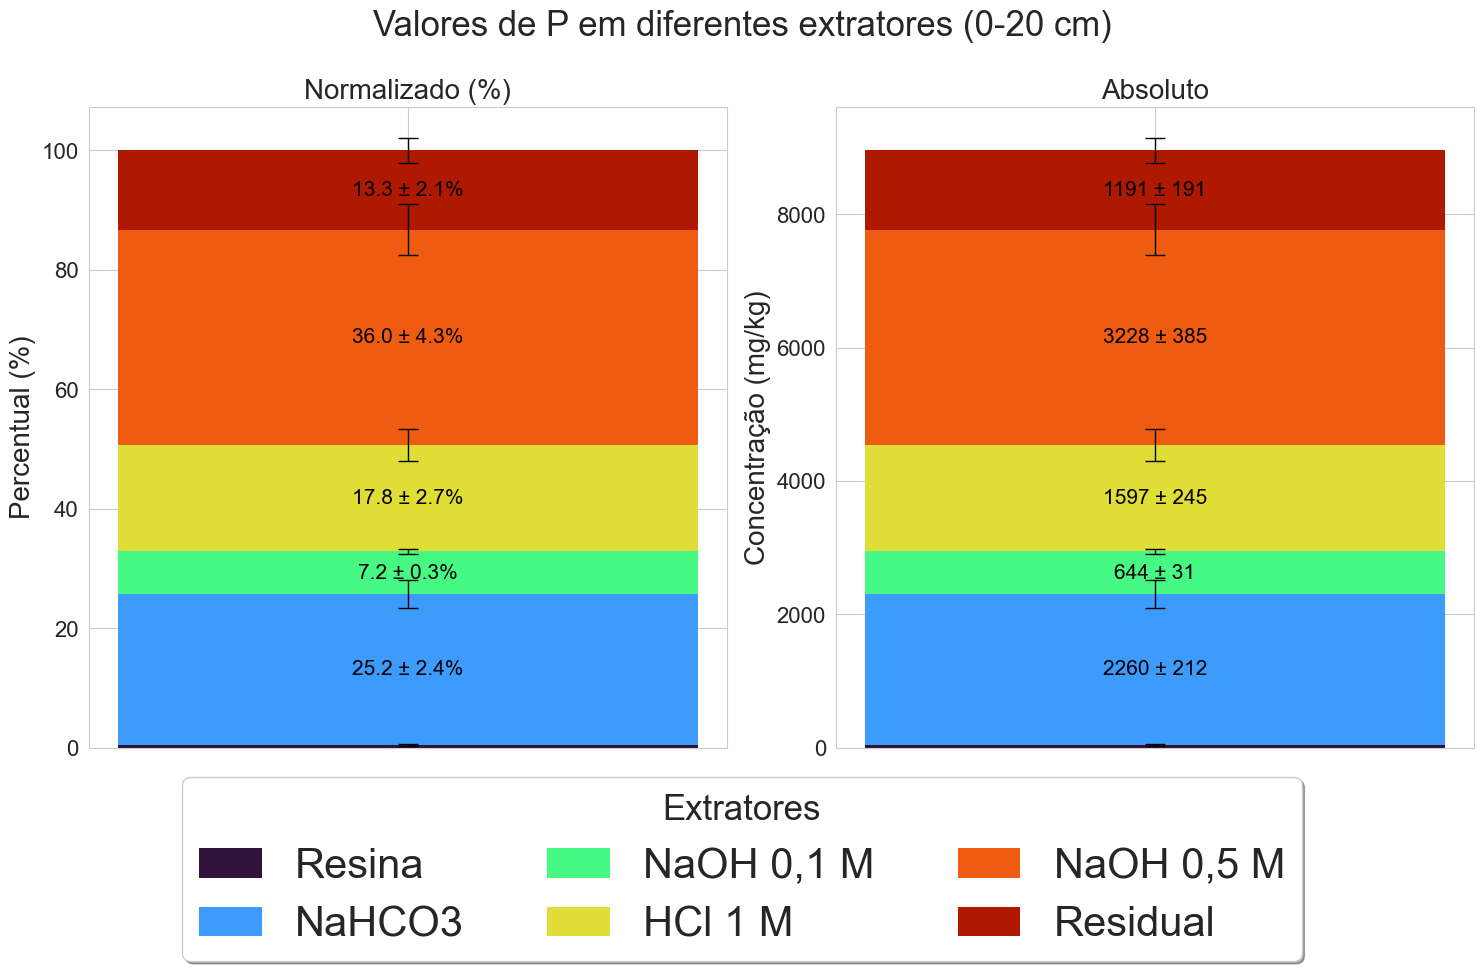

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configurar estilo seaborn
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# Usar a paleta turbo com posições otimizadas no gradiente
turbo_positions = [0.0, 0.2, 0.4, 0.6, 0.8, 0.93]  # Posições no gradiente turbo
cmap = plt.cm.turbo
cores_turbo_otimizadas = [cmap(pos) for pos in turbo_positions]

# Criar dados
df_norm = pd.DataFrame({
    'Extrator': nomes_termos,
    'Media': media_0_20_norm,
    'Std': std_0_20_norm,
    'Categoria': 'Normalizado (%)'
})

df_abs = pd.DataFrame({
    'Extrator': nomes_termos,
    'Media': media_0_20,
    'Std': std_0_20,
    'Categoria': 'Absoluto (mg/kg)'
})

# Criar a figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

# Função para criar gráfico com médias e desvios - TODOS OS NÚMEROS EM PRETO
def criar_grafico(ax, medias, stds, titulo, ylabel, is_percent=False):
    bottom = 0
    for i, (media, std) in enumerate(zip(medias, stds)):
        ax.bar(' ', media, 
               bottom=bottom, 
               yerr=std,
               capsize=7,
               error_kw={'capthick': 1, 'elinewidth': 1, 'color': 'black'},
               alpha=1,
               color=cores_turbo_otimizadas[i],
               edgecolor=None,
               linewidth=0)
        
        # Texto com MÉDIA ± DESVIO PADRÃO para valores significativos - SEMPRE PRETO
        if media > max(medias) * 0.07:
            y_position = bottom + media/2
            if is_percent:
                texto = f'{media:.1f} ± {std:.1f}%'
            else:
                texto = f'{media:.0f} ± {std:.0f}'
            
            ax.text(0, y_position, texto,
                   ha='center', va='center', 
                   fontsize=15,
                   color='black')  # SEMPRE PRETO
        
        bottom += media
    
    ax.set_title(titulo, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)

# Aplicar aos dois gráficos
criar_grafico(ax1, media_0_20_norm, std_0_20_norm, 'Normalizado (%)', 'Percentual (%)', is_percent=True)
criar_grafico(ax2, media_0_20, std_0_20, 'Absoluto', 'Concentração (mg/kg)', is_percent=False)

# Aumentar fonte dos eixos
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

# Layout final
plt.suptitle('Valores de P em diferentes extratores (0-20 cm)', fontsize=25, y=1)
plt.tight_layout()

# LEGENDA AUMENTADA
legend = fig.legend(nomes_termos, 
           loc='lower center', 
           bbox_to_anchor=(0.5, -0.08),
           ncol=3,
           frameon=True,
           fancybox=True,
           shadow=True,
           fontsize=30,
           title='Extratores',
           title_fontsize=25,
           markerscale=10,
           handlelength=1.5,
           handletextpad=0.8)

plt.subplots_adjust(bottom=0.18)
plt.savefig('GRAFICO_BARRAS_VERTICAIS_FRACIONAMENTO', dpi = 600,bbox_inches='tight')
plt.show()

In [200]:
std_0_20_norm

array([0.10414085, 2.36334634, 0.34613362, 2.7319118 , 4.29955608,
       2.12621764])

In [212]:
media_0_20_norm

array([ 0.47051347, 25.21642504,  7.18126584, 17.82337932, 36.02024003,
       13.28817632])

c:\Program Files\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 8323 (\N{SUBSCRIPT THREE}) missing from current font.

c:\Program Files\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8323 (\N{SUBSCRIPT THREE}) missing from current font.



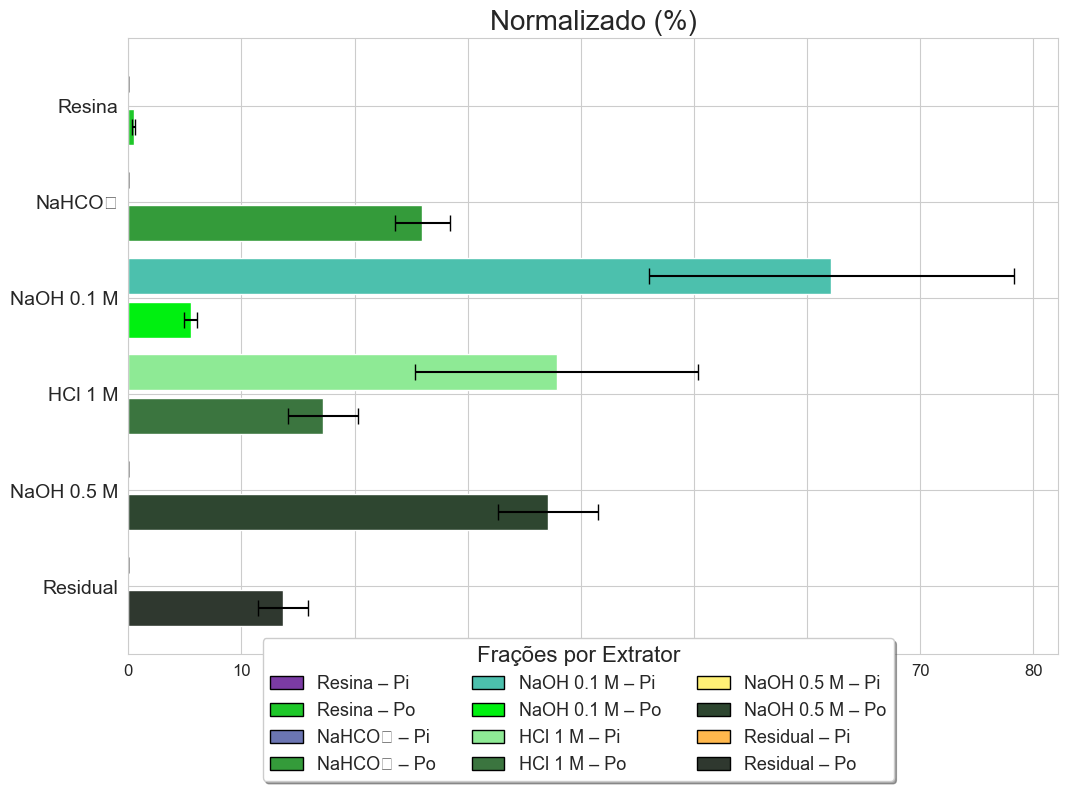

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# --------------------------------------------
# Dados
# --------------------------------------------
nomes = ["Resina", "NaHCO₃", "NaOH 0.1 M", "HCl 1 M", "NaOH 0.5 M", "Residual"]
cores_Po = ['#1EC729', '#349B3A', '#00F010', '#3B753F', '#2E4630', '#2F382F']
cores_Pi = ['#7b3ba4', '#6b75b2', '#4cc0ad', '#8eea95', '#fff176', '#ffb84d']

# --------------------------------------------
# Criar DataFrame NORMALIZADO
# --------------------------------------------
def montar_df(medias_Po, stds_Po, medias_Pi, stds_Pi):
    registros = []
    for i, nome in enumerate(nomes):
        registros.append([nome, "Pi", medias_Pi[i], stds_Pi[i], cores_Pi[i], 2*i])       # Pi
        registros.append([nome, "Po", medias_Po[i], stds_Po[i], cores_Po[i], 2*i + 0.9]) # Po
    return pd.DataFrame(registros, columns=["Extrator", "Fracao", "Media", "Std", "Cor", "ypos"])

df_norm = montar_df(media_Po_norm, std_Po_norm, media_Pi_norm, std_Pi_norm)

# --------------------------------------------
# Criar gráfico
# --------------------------------------------
fig, ax = plt.subplots(figsize=(12, 8))

bar_height = 0.75  # mesma altura sempre

for _, row in df_norm.iterrows():
    ax.barh(
        row["ypos"],
        row["Media"],
        xerr=row["Std"],
        capsize=6,
        color=row["Cor"],
        height=bar_height
    )

# Eixo Y centralizado entre Po e Pi
ticks = [2*i + 0.45 for i in range(len(nomes))]
ax.set_yticks(ticks)
ax.set_yticklabels(nomes, fontsize=14)

ax.set_xlabel("Percentual (%)", fontsize=16)
ax.set_title("Normalizado (%)", fontsize=20)
ax.invert_yaxis()

# --------------------------------------------
# LEGENDA COMPLETA (Po e Pi separados)
# --------------------------------------------
from matplotlib.patches import Patch

# --------------------------------------------
# LEGENDA COM MARCADORES RETANGULARES
# --------------------------------------------
handles = []
labels = []

for i, nome in enumerate(nomes):
    # Pi
    h_pi = Patch(facecolor=cores_Pi[i], edgecolor="black")
    handles.append(h_pi)
    labels.append(f"{nome} – Pi")

    # Po
    h_po = Patch(facecolor=cores_Po[i], edgecolor="black")
    handles.append(h_po)
    labels.append(f"{nome} – Po")

fig.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.06),
    ncol=3,
    fontsize=13,
    frameon=True,
    fancybox=True,
    shadow=True,
    title="Frações por Extrator",
    title_fontsize=16,
    handlelength=1.8
)



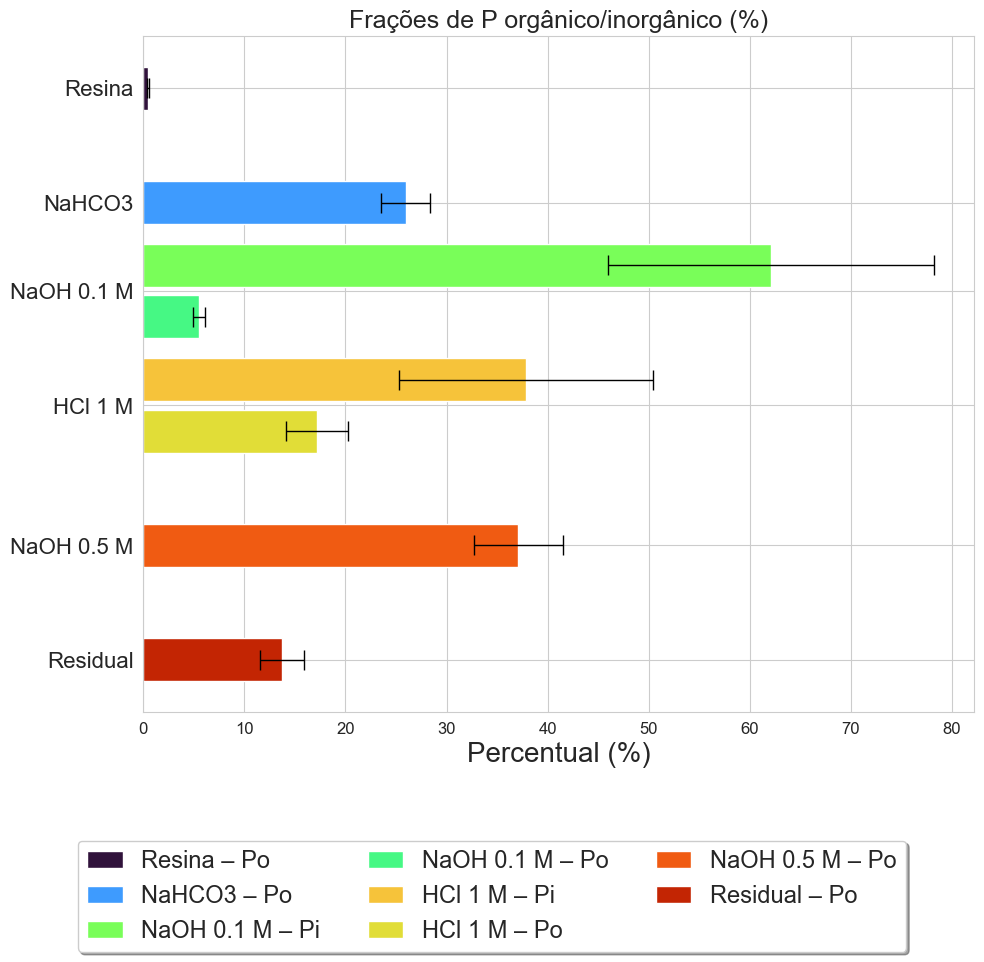

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import numpy as np

# --------------------------------------------------------
# ESTILO SEABORN (igual ao seu código)
# --------------------------------------------------------
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# --------------------------------------------------------
# CORES
# --------------------------------------------------------
nomes = ["Resina", "NaHCO3", "NaOH 0.1 M", "HCl 1 M", "NaOH 0.5 M", "Residual"]

turbo_positions = [0.0, 0.2, 0.4, 0.60, 0.80, 0.9]
turbo_positions_2 = [0.1, 0.25, 0.45, 0.65, 0.85, 0.95]
cmap = plt.cm.turbo

cores_turbo_otimizadas = [cmap(pos) for pos in turbo_positions]
cores_turbo_otimizadas_2 = [cmap(pos) for pos in turbo_positions_2]

cores_Po = cores_turbo_otimizadas
cores_Pi = cores_turbo_otimizadas_2

# --------------------------------------------------------
# Função que MONTA O DATAFRAME sem incluir valores zero
# --------------------------------------------------------
def montar_df(medias_Po, stds_Po, medias_Pi, stds_Pi):
    registros = []
    for i, nome in enumerate(nomes):

        # Pi aparece somente se > 0
        if medias_Pi[i] > 0:
            registros.append([nome, "Pi", medias_Pi[i], stds_Pi[i], cores_Pi[i], 2*i])

        # Po aparece somente se > 0
        if medias_Po[i] > 0:
            registros.append([nome, "Po", medias_Po[i], stds_Po[i], cores_Po[i], 2*i + 0.9])

    return pd.DataFrame(registros, columns=["Extrator", "Fracao", "Media", "Std", "Cor", "ypos"])


# --------------------------------------------------------
# DF com valores normalizados (PO E PI sem zeros)
# --------------------------------------------------------
df_norm = montar_df(media_Po_norm, std_Po_norm, media_Pi_norm, std_Pi_norm)

# --------------------------------------------------------
# FIGURA — igual ao seu modelo
# --------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 9))
bar_height = 0.75

# Barras sem sobreposição  
for _, row in df_norm.iterrows():
    ax.barh(
        row["ypos"],
        row["Media"],
        xerr=row["Std"],
        height=bar_height,
        color=row["Cor"],
        capsize=7,
        error_kw={'capthick': 1, 'elinewidth': 1, 'color': 'black'}
    )

# Ajustes de eixo Y
ticks = []
labels_ticks = []

for i, nome in enumerate(nomes):

    # posições que EXISTEM realmente para aquele extrator
    ypos_existentes = df_norm.loc[df_norm["Extrator"] == nome, "ypos"].tolist()

    if len(ypos_existentes) > 0:
        tick_pos = np.mean(ypos_existentes)   # média das posições reais
        ticks.append(tick_pos)
        labels_ticks.append(nome)

ax.set_yticks(ticks)
ax.set_yticklabels(labels_ticks, fontsize=16)

ax.set_xlabel("Percentual (%)", fontsize=20)
ax.set_title("Frações de P orgânico/inorgânico (%)", fontsize=18)
ax.invert_yaxis()

# --------------------------------------------------------
# LEGENDA — sem itens com zero
# --------------------------------------------------------
handles = []
labels = []

for i, nome in enumerate(nomes):

    # Pi
    if media_Pi_norm[i] > 0:
        handles.append(Patch(facecolor=cores_Pi[i]))
        labels.append(f"{nome} – Pi")

    # Po
    if media_Po_norm[i] > 0:
        handles.append(Patch(facecolor=cores_Po[i]))
        labels.append(f"{nome} – Po")

fig.legend(
    handles,
    labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.08),
    ncol=3,
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=17,
    title_fontsize=15,
    handlelength=1.5,
    handletextpad=0.8
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.20)
plt.savefig('GRAFICO_HORIZONTAL_PI_PO', dpi = 600, bbox_inches='tight')
plt.show()


In [221]:
np.mean(
    [sum(R1_0_10_Pt),sum(R2_0_10_Pt),sum(R1_10_20_Pt),sum(R2_10_20_Pt) ])

8960.955

In [223]:
np.std([sum(R1_0_10_Pt),sum(R2_0_10_Pt),sum(R1_10_20_Pt),sum(R2_10_20_Pt)], ddof = 1)

395.60076209060355

In [214]:
(R1_10_20_Pt[2]+R1_10_20_Pt[3]+R1_10_20_Pt[4])/(sum(R1_10_20_Pt))

0.5735349041131481

In [215]:
(R2_0_10_Pt[2]+R2_0_10_Pt[3]+R2_0_10_Pt[4])/(sum(R2_0_10_Pt))

0.6192046582010261

In [216]:
(R1_10_20_Pt[2]+R1_10_20_Pt[3]+R1_10_20_Pt[4])/(sum(R2_10_20_Pt))

0.6315940059368406

In [217]:
np.std([0.6679, 0.5735, 0.6192, 0.6316], ddof = 1)

0.03896429989960898

In [218]:
np.mean([0.6679, 0.5735, 0.6192, 0.6316])

0.62305